In [1]:
import pandas as pd

In [2]:
# read the csv file of the event log
df = pd.read_csv(r'C:\Users\Nela\Desktop\University Courses\Semester 4\Master Thesis\Thesis\DataSet\Real_World_Event_Logs\Scarcity of labels paper\bpic15-0.3-1.csv')

C:\Users\Nela\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3326: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
# print out the head of the event log
df.head()

,case_id,event_position,activity_name1,timestamp,monitoringResource,org:resource,label,anomaly_type,anomaly_description,action_code,activity_name,activityNameNL,concept:name,dateFinished,dueDate,lifecycle:transition,planned,question,time:timestamp,dateStop
0,10009138,1,01_HOOFD_010+complete,2014-04-11T00:00:00+02:00,2670601,9264148,normal,-,-,01_HOOFD_010,register submission date request,registratie datum binnenkomst aanvraag,01_HOOFD_010,14/04/2014 00:00,2014-04-17T09:30:39+02:00,complete,2014-04-15T09:30:39+02:00,EMPTY,2014-04-11T00:00:00+02:00,NaN
1,10009138,2,01_HOOFD_011+complete,2014-04-14T00:00:00+02:00,2670601,9264148,normal,-,-,01_HOOFD_011,OLO messaging active,OLO berichtenverkeer actief,01_HOOFD_011,14/04/2014 00:00,NaN,complete,2014-04-15T09:34:03+02:00,FALSE,2014-04-14T00:00:00+02:00,NaN
2,10009138,3,01_HOOFD_020+complete,2014-04-14T00:00:00+02:00,2670601,9264148,normal,-,-,01_HOOFD_020,send confirmation receipt,versturen ontvangstbevestiging,01_HOOFD_020,14/04/2014 00:00,NaN,complete,2014-04-15T09:34:03+02:00,TRUE,2014-04-14T00:00:00+02:00,NaN
3,10009138,4,02_DRZ_010+complete,2014-04-14T00:00:00+02:00,2670601,9264148,normal,-,-,02_DRZ_010,forward to the competent authority,doorsturen aan bevoegd gezag,02_DRZ_010,14/04/2014 00:00,2014-04-21T09:37:17+02:00,complete,2014-04-15T09:37:17+02:00,FALSE,2014-04-14T00:00:00+02:00,NaN
4,10009138,5,04_BPT_005+complete,2014-04-14T00:00:00+02:00,2670601,9264148,normal,-,-,04_BPT_005,regular procedure without MER,reguliere procedure zonder MER,04_BPT_005,14/04/2014 00:00,NaN,complete,2014-04-15T09:37:22+02:00,TRUE,2014-04-14T00:00:00+02:00,NaN


In [4]:
# combine the rows by case number 
activities= df["activity_name"].astype(str)
activities

0                      register submission date request
1                                  OLO messaging active
2                             send confirmation receipt
3                    forward to the competent authority
4                         regular procedure without MER
                              ...                      
52200                              phase decision taken
52201      record date of decision environmental permit
52202     start decision phase decision permitting sent
52203    set decision phase decision permitting decided
52204      enter senddate decision environmental permit
Name: activity_name, Length: 52205, dtype: object

In [5]:
import numpy as np
uniq=len(np.unique(activities))
uniq

289

In [6]:
#Cleaning the text
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(len(activities)):
    pre = re.sub('[^a-zA-Z]', ' ', activities[i])
    pre = pre.lower()
    pre = pre.split()
    pre = [ps.stem(word) for word in pre if not word in set(stopwords.words('english'))]
    pre = ' '.join(pre)
    corpus.append(pre)

In [7]:
corpus

['regist submiss date request',
 'olo messag activ',
 'send confirm receipt',
 'forward compet author',
 'regular procedur without mer',
 'creat procedur confirm',
 'creat subcas complet',
 'creat public document',
 'phase applic receiv',
 'start waboprocedur',
 'registr date public',
 'send confirm receipt',
 'enter senddat acknowledg',
 'request complet',
 'send letter progress',
 'procedur chang',
 'articl wabo appli',
 'ground refus',
 'ask stakehold view',
 'suspens ground applic',
 'coordin applic',
 'law',
 'decis date prior decis',
 'submit decis',
 'procedur chang',
 'phase decis readi',
 'gener decis environment permit',
 'phase applic recept',
 'phase advic known',
 'creat environment permit decis',
 'treat subcas content',
 'assess content complet',
 'complet subcas content',
 'set decis statu',
 'regist object appeal period',
 'creat cover letter decis',
 'transcript decis environment permit stakehold',
 'record date decis environment permit',
 'enter senddat decis environ

In [8]:
len(corpus)

52205

In [9]:
import nltk 
from nltk.tokenize import sent_tokenize
vocab_sent = []
for i in range(len(corpus)):
    all_sent = nltk.sent_tokenize(corpus[i])
    vocab_sent.append(all_sent)
    print(all_sent)

['regist submiss date request']
['olo messag activ']
['send confirm receipt']
['forward compet author']
['regular procedur without mer']
['creat procedur confirm']
['creat subcas complet']
['creat public document']
['phase applic receiv']
['start waboprocedur']
['registr date public']
['send confirm receipt']
['enter senddat acknowledg']
['request complet']
['send letter progress']
['procedur chang']
['articl wabo appli']
['ground refus']
['ask stakehold view']
['suspens ground applic']
['coordin applic']
['law']
['decis date prior decis']
['submit decis']
['procedur chang']
['phase decis readi']
['gener decis environment permit']
['phase applic recept']
['phase advic known']
['creat environment permit decis']
['treat subcas content']
['assess content complet']
['complet subcas content']
['set decis statu']
['regist object appeal period']
['creat cover letter decis']
['transcript decis environment permit stakehold']
['record date decis environment permit']
['enter senddat decis environ

['send confirm receipt addit data']
['receiv addit inform']
['phase addit inform receiv']
['request complet']
['procedur chang complet']
['send letter progress']
['creat subcas content']
['procedur chang']
['articl wabo appli']
['ground refus']
['submit draft decis']
['set decis statu']
['phase advic known']
['phase applic recept']
['gener draft decis environment permit']
['creat draft environtment permit']
['phase concept draft decis readi']
['enrich draft decis']
['open draft decis inspect']
['creat cover letter draft decis']
['phase draft decis readi']
['phase draft decis sent']
['phase draft decis made']
['enter senddat draft decis']
['send design decis stakehold']
['enter senddat draft decis']
['enter date advic treatment environment permit']
['enter senddat draft decis environment permit']
['set decis phase draft decis permit sent']
['enter date draft decisionenvironment permit']
['start decisionphas draft decis permit decid']
['date draft decis inspect']
['set decis phase draft 

['phase addit inform receiv']
['phase advic known']
['creat environment permit decis']
['gener decis environment permit']
['phase decis readi']
['set decis phase decis permit decid']
['enter senddat decis']
['transcript decis environment permit stakehold']
['set decis statu']
['record date decis environment permit']
['enter senddat decis environment permit']
['regist submiss date request']
['olo messag activ']
['send confirm receipt']
['forward compet author']
['regular procedur without mer']
['creat procedur confirm']
['publish']
['creat subcas complet']
['procedur chang']
['creat public document']
['phase applic receiv']
['send confirm receipt']
['registr date public']
['start waboprocedur']
['enter senddat acknowledg']
['term suppli miss data']
['creat letter request miss data']
['request complet']
['retriev miss data']
['enter senddat retriev miss data']
['enter receipt addit data']
['receiv addit inform']
['send confirm receipt addit data']
['phase addit inform receiv']
['phase as

['set decis statu']
['decis keep perman suspend']
['resum complet subcas']
['creat decis perman suspend']
['creat cover letter perman suspens']
['phase perman suspend']
['enter senddat decis perman suspens']
['enter date decis perman suspens']
['enter senddat decis perman suspens']
['start decis phase perman suspend decid']
['start decis phase perman suspens sent']
['olo messag activ']
['send confirm receipt']
['forward compet author']
['regular procedur without mer']
['creat procedur confirm']
['publish']
['creat subcas complet']
['creat public document']
['start waboprocedur']
['send confirm receipt']
['regist submiss date request']
['phase applic receiv']
['registr date public']
['enter senddat acknowledg']
['request complet']
['send letter progress']
['procedur chang']
['articl wabo appli']
['ground refus']
['ask stakehold view']
['suspens ground applic']
['coordin applic']
['law']
['decis date prior decis']
['procedur chang']
['treat subcas content']
['complet subcas content']
['p

['suspens ground applic']
['coordin applic']
['law']
['decis date prior decis']
['creat environment permit decis']
['set decis statu']
['phase advic known']
['submit decis']
['regist object appeal period']
['creat cover letter decis']
['creat public document']
['enter senddat decis']
['phase decis sent']
['transcript decis environment permit stakehold']
['phase decis readi']
['phase decis taken']
['enter senddat decis environment permit']
['enter date public decis environment permit']
['gener decis environment permit']
['record date decis environment permit']
['enter senddat decis environment permit']
['set decis phase decis permit decid']
['start decis phase decis permit sent']
['set decis phase decis permit publish']
['regist submiss date request']
['send confirm receipt']
['forward compet author']
['regular procedur without mer']
['creat procedur confirm']
['publish']
['creat public document']
['send confirm receipt']
['registr date public']
['start waboprocedur']
['phase applic rec

['set decis phase decis permit decid']
['record date decis environment permit']
['enter senddat decis environment permit']
['start decis phase decis permit sent']
['set decis phase decis permit publish']
['regist submiss date request']
['olo messag activ']
['send confirm receipt']
['forward compet author']
['regular procedur without mer']
['creat procedur confirm']
['publish']
['creat public document']
['phase applic receiv']
['send confirm receipt']
['start waboprocedur']
['registr date public']
['enter senddat acknowledg']
['creat subcas complet']
['submit decis']
['procedur chang']
['request complet']
['send letter progress']
['creat subcas content']
['procedur chang']
['articl wabo appli']
['ground refus']
['ask stakehold view']
['suspens ground applic']
['coordin applic']
['law']
['decis date prior decis']
['creat environment permit decis']
['set decis statu']
['phase decis readi']
['phase advic known']
['gener decis environment permit']
['phase applic recept']
['regist object app

['termin request']
['extend procedur term']
['subcas complet complet']
['activ regular procedur']
['regular procedur appli']
['request complet']
['phase applic recept']
['waw permit aspect']
['treat subcas content']
['complet subcas content']
['articl wabo appli']
['phase advic known']
['assess content complet']
['ground refus']
['ask stakehold view']
['suspens ground applic']
['law']
['creat environment permit decis']
['gener decis environment permit']
['regist object appeal period']
['transcript decis environment permit stakehold']
['gener public document decis environment permit']
['regist date environment permit decis']
['enter senddat decis environment permit']
['enter senddat procedur confirm']
['enter date public decis environment permit']
['set phase phase permit irrevoc']
['close case']
['regist submiss date request']
['enter senddat procedur confirm']
['phase applic receiv']
['recept olo']
['forward compet author']
['regular procedur without mer']
['send procedur confirm']
['

['recept olo']
['send confirm receipt']
['enter senddat procedur confirm']
['enter senddat procedur confirm']
['enter senddat procedur confirm']
['registr date publish receiv request']
['enter senddat retriev miss data']
['forward compet author']
['regular procedur without mer']
['nan']
['send procedur confirm']
['extend procedur term']
['applic stakehold']
['treat subcas complet']
['registr date publish receiv request']
['subcas complet complet']
['waw permit aspect']
['activ regular procedur']
['regular procedur appli']
['request complet']
['term suppli miss data']
['nan']
['retriev miss data']
['enter receipt addit data']
['receiv addit inform']
['mer present supplement']
['waw permit aspect']
['treat subcas complet']
['subcas complet complet']
['activ regular procedur']
['regular procedur appli']
['request complet']
['phase applic recept']
['waw permit aspect']
['treat subcas content']
['complet subcas content']
['articl wabo appli']
['assess content complet']
['phase advic known']

['gener public document decis environment permit']
['enter date public decis environment permit']
['regist submiss date request']
['phase applic receiv']
['recept olo']
['regist submiss date request']
['enter senddat acknowledg']
['phase applic receiv']
['recept olo']
['send confirm receipt']
['forward compet author']
['registr date publish receiv request']
['regular procedur without mer']
['send procedur confirm']
['suspend term']
['extend procedur term']
['termin request']
['applic stakehold']
['waw permit aspect']
['treat subcas complet']
['registr date publish receiv request']
['subcas complet complet']
['procedur chang']
['request complet']
['phase applic recept']
['send letter progress']
['waw permit aspect']
['treat subcas content']
['complet subcas content']
['activ regular procedur']
['articl wabo appli']
['assess content complet']
['phase advic known']
['ground refus']
['ask stakehold view']
['suspens ground applic']
['law']
['creat environment permit decis']
['gener decis en

['gener decis environment permit']
['transcript decis environment permit stakehold']
['gener public document decis environment permit']
['regist date environment permit decis']
['enter senddat decis environment permit']
['enter date public decis environment permit']
['regist submiss date request']
['enter senddat acknowledg']
['registr date publish receiv request']
['enter senddat decis procedur term extens']
['enter senddat procedur confirm']
['enter date decis procedur term extens']
['enter senddat retriev miss data']
['enter senddat suspens compet author']
['enter receipt addit data']
['recept olo']
['forward compet author']
['regular procedur without mer']
['waw permit aspect']
['phase applic receiv']
['subcas complet complet']
['send procedur confirm']
['registr date publish receiv request']
['treat subcas complet']
['send confirm receipt']
['procedur chang']
['request complet']
['term suppli miss data']
['applic stakehold']
['termin request']
['extend procedur term']
['suspend te

['send confirm receipt']
['forward compet author']
['regular procedur without mer']
['enter senddat acknowledg']
['enter senddat procedur confirm']
['enter senddat retriev miss data']
['send procedur confirm']
['applic stakehold']
['waw permit aspect']
['treat subcas complet']
['subcas complet complet']
['procedur chang']
['request complet']
['term suppli miss data']
['retriev miss data']
['enter receipt addit data']
['registr date publish receiv request']
['receiv addit inform']
['mer present supplement']
['waw permit aspect']
['treat subcas complet']
['subcas complet complet']
['procedur chang']
['request complet']
['phase applic recept']
['send letter progress']
['suspend term']
['extend procedur term']
['termin request']
['registr date publish receiv request']
['waw permit aspect']
['treat subcas content']
['complet subcas content']
['activ regular procedur']
['articl wabo appli']
['phase advic known']
['assess content complet']
['ground refus']
['ask stakehold view']
['suspens gro

['ask stakehold view']
['suspens ground applic']
['law']
['creat environment permit decis']
['regist date environment permit decis']
['enter senddat decis environment permit']
['gener decis environment permit']
['transcript decis environment permit stakehold']
['gener public document decis environment permit']
['enter date public decis environment permit']
['regist submiss date request']
['enter senddat acknowledg']
['phase applic receiv']
['recept olo']
['send confirm receipt']
['forward compet author']
['regular procedur without mer']
['enter senddat procedur confirm']
['registr date publish receiv request']
['send procedur confirm']
['suspend term']
['extend procedur term']
['termin request']
['applic stakehold']
['waw permit aspect']
['treat subcas complet']
['subcas complet complet']
['procedur chang']
['request complet']
['phase applic recept']
['send letter progress']
['registr date publish receiv request']
['waw permit aspect']
['treat subcas content']
['complet subcas content'

['publish offici draft decis']
['phase draft decis made']
['send design decis stakehold']
['enter date draft decisionenvironment permit']
['enter senddat draft decis environment permit']
['public date draft decis']
['date draft decis inspect']
['perspect draft decis environment permit receiv']
['final vvgb applic']
['suspens ground applic']
['creat environment permit decis']
['gener decis environment permit']
['phase decis taken']
['transcript decis environment permit stakehold']
['regist date environment permit decis']
['gener public document decis environment permit']
['enter senddat decis environment permit']
['enter date public decis environment permit']
['regist deadlin']
['set phase phase permit irrevoc']
['appeal logd']
['contest decis affect']
['close case']
['regist submiss date request']
['enter senddat acknowledg']
['enter senddat procedur confirm']
['send confirm receipt']
['permit need notif need']
['applic stakehold']
['termin request']
['forward compet author']
['regular

['applic stakehold']
['registr date public']
['procedur chang']
['request complet']
['term suppli miss data']
['retriev miss data']
['send procedur confirm']
['treat subcas complet']
['subcas complet complet']
['receiv addit inform']
['keep perman suspend']
['creat decis perman suspend']
['decis perman suspend']
['enter date decis perman suspens']
['copi decis perman suspens stakehold']
['enter senddat decis perman suspens']
['extend procedur term']
['suspend term']
['inform bag administr']
['termin request']
['permit need notif need']
['object perman suspens receiv']
['decis perman suspens irrevoc']
['regist deadlin']
['stop procedur perman suspens']
['close case']
['regist submiss date request']
['phase applic receiv']
['send confirm receipt']
['applic stakehold']
['send confirm receipt']
['enter senddat acknowledg']
['forward compet author']
['regular procedur without mer']
['send procedur confirm']
['enter senddat procedur confirm']
['inform bag administr']
['investig bag object']


['receiv addit inform']
['enter receipt addit data']
['treat subcas complet']
['waw permit aspect']
['subcas complet complet']
['procedur chang']
['request complet']
['phase applic recept']
['send letter progress']
['treat subcas content']
['complet subcas content']
['request inform']
['waw permit aspect']
['procedur chang complet']
['articl wabo appli']
['phase advic known']
['creat draft environtment permit']
['gener draft decis environment permit']
['phase concept draft decis readi']
['dismiss mandat']
['enter date draft decisionenvironment permit']
['phase draft decis made']
['open draft decis inspect']
['publish offici draft decis']
['phase draft decis made']
['send design decis stakehold']
['enter senddat draft decis environment permit']
['public date draft decis']
['date draft decis inspect']
['perspect draft decis environment permit receiv']
['final vvgb applic']
['treat subcas final vvgb']
['subcas final vvgb complet']
['vvgb posit']
['suspens ground applic']
['creat environme

['investig bag object']
['extend procedur term']
['suspend term']
['treat subcas complet']
['subcas complet complet']
['procedur chang']
['request complet']
['send letter progress']
['phase applic recept']
['complet subcas content']
['treat subcas content']
['procedur chang']
['articl wabo appli']
['ground refus']
['phase advic known']
['assess content complet']
['ask stakehold view']
['suspens ground applic']
['law']
['creat environment permit decis']
['regist date environment permit decis']
['gener decis environment permit']
['phase decis taken']
['enter senddat decis environment permit']
['transcript decis environment permit stakehold']
['gener public document decis environment permit']
['continu abort mutat bag object']
['enter date public decis environment permit']
['regist submiss date request']
['phase applic receiv']
['termin request']
['send confirm receipt']
['enter senddat acknowledg']
['send confirm receipt']
['forward compet author']
['regular procedur without mer']
['send

['send procedur confirm']
['registr date public']
['treat subcas complet']
['subcas complet complet']
['procedur chang']
['request complet']
['phase applic recept']
['enter senddat procedur confirm']
['send procedur confirm']
['waw permit aspect']
['public date draft decis']
['enter date draft decisionenvironment permit']
['date draft decis inspect']
['permit need notif need']
['applic stakehold']
['termin request']
['inform bag administr']
['suspend term']
['extend procedur term']
['treat subcas content']
['investig bag object']
['complet subcas content']
['procedur chang']
['articl wabo appli']
['assess content complet']
['phase advic known']
['ground refus']
['creat draft environtment permit']
['phase concept draft decis readi']
['gener draft decis environment permit']
['dismiss mandat']
['phase draft decis made']
['open draft decis inspect']
['publish offici draft decis']
['phase draft decis made']
['send design decis stakehold']
['enter senddat draft decis environment permit']
['p

['registr date public']
['investig bag object']
['treat subcas complet']
['subcas complet complet']
['procedur chang']
['request complet']
['term suppli miss data']
['enter senddat retriev miss data']
['retriev miss data']
['enter date decis perman suspens']
['receiv addit inform']
['keep perman suspend']
['creat decis perman suspend']
['regist deadlin']
['decis perman suspens irrevoc']
['decis perman suspend']
['enter senddat decis perman suspens']
['copi decis perman suspens stakehold']
['object perman suspens receiv']
['cancel bag object research']
['phase procedur abort']
['mutat bag carri object']
['regist submiss date request']
['olo messag activ']
['phase applic receiv']
['send confirm receipt']
['enter senddat acknowledg']
['send confirm receipt']
['forward compet author']
['regular procedur without mer']
['enter senddat procedur confirm']
['send procedur confirm']
['registr date public']
['inform bag administr']
['treat subcas complet']
['subcas complet complet']
['procedur ch

['gener decis environment permit']
['phase decis taken']
['transcript decis environment permit stakehold']
['gener public document decis environment permit']
['continu abort mutat bag object']
['enter senddat decis environment permit']
['regist date environment permit decis']
['enter date public decis environment permit']
['regist submiss date request']
['enter senddat acknowledg']
['enter senddat procedur confirm']
['enter senddat retriev miss data']
['enter senddat acknowledg']
['enter date draft decisionenvironment permit']
['enter senddat draft decis environment permit']
['date draft decis inspect']
['olo messag activ']
['phase applic receiv']
['send confirm receipt']
['send confirm receipt']
['forward compet author']
['regular procedur without mer']
['mer present']
['activ regular procedur']
['read field phase applic']
['start waboprocedur']
['send procedur confirm']
['publish']
['treat subcas complet']
['subcas complet complet']
['procedur chang']
['request complet']
['term suppl

['subcas complet complet']
['procedur chang']
['request complet']
['send letter progress']
['phase applic recept']
['treat subcas content']
['procedur chang']
['complet subcas content']
['articl wabo appli']
['phase advic known']
['assess content complet']
['ground refus']
['ask stakehold view']
['suspens ground applic']
['law']
['creat environment permit decis']
['gener decis environment permit']
['phase decis taken']
['transcript decis environment permit stakehold']
['continu abort mutat bag object']
['gener public document decis environment permit']
['enter senddat decis environment permit']
['regist date environment permit decis']
['enter date public decis environment permit']
['regist submiss date request']
['olo messag activ']
['phase applic receiv']
['send confirm receipt']
['send confirm receipt']
['enter senddat acknowledg']
['forward compet author']
['regular procedur without mer']
['send procedur confirm']
['enter senddat procedur confirm']
['registr date public']
['inform b

['send confirm receipt']
['send confirm receipt']
['enter senddat acknowledg']
['forward compet author']
['regular procedur without mer']
['enter senddat procedur confirm']
['send procedur confirm']
['registr date public']
['inform bag administr']
['treat subcas complet']
['subcas complet complet']
['procedur chang']
['enter senddat decis suspens']
['request complet']
['term suppli miss data']
['enter senddat retriev miss data']
['retriev miss data']
['receiv addit inform']
['enter receipt addit data']
['resum complet subcas']
['subcas complet complet']
['mer present supplement']
['request complet']
['phase applic recept']
['send letter progress']
['complet subcas content']
['treat subcas content']
['procedur chang complet']
['articl wabo appli']
['ground refus']
['ask stakehold view']
['suspens ground applic']
['articl appli']
['articl appli']
['enter date decis suspens']
['refus suspens']
['law']
['creat decis suspens art wabo']
['phase advic known']
['send decis suspens']
['treat su

['suspens ground applic']
['nan']
['law']
['creat environment permit decis']
['decis date prior decis']
['gener decis environment permit']
['submit decis']
['phase decis taken']
['regist object appeal period']
['transcript decis environment permit stakehold']
['enter senddat decis environment permit']
['enter senddat decis']
['phase decis sent']
['creat public document']
['record date decis environment permit']
['enter senddat decis environment permit']
['date decis inspect']
['regist submiss date request']
['olo messag activ']
['termin request']
['phase applic receiv']
['send confirm receipt']
['enter senddat acknowledg']
['send confirm receipt']
['forward compet author']
['regular procedur without mer']
['start waboprocedur']
['enter senddat procedur confirm']
['send procedur confirm']
['registr date public']
['inform bag administr']
['creat public document']
['investig bag object']
['treat subcas complet']
['subcas complet complet']
['procedur chang']
['request complet']
['phase app

['phase forward compet author']
['enter senddat letter compet author']
['enter senddat letter stakehold']
['regist submiss date request']
['olo messag activ']
['phase applic receiv']
['send confirm receipt']
['enter senddat acknowledg']
['send confirm receipt']
['forward compet author']
['regular procedur without mer']
['start waboprocedur']
['send procedur confirm']
['enter senddat procedur confirm']
['treat subcas complet']
['subcas complet complet']
['creat public document']
['procedur chang']
['request complet']
['phase applic recept']
['procedur chang complet']
['send letter progress']
['treat subcas content']
['complet subcas content']
['procedur chang']
['articl wabo appli']
['assess content complet']
['phase advic known']
['ground refus']
['ask stakehold view']
['suspens ground applic']
['law']
['creat environment permit decis']
['decis date prior decis']
['gener decis environment permit']
['submit decis']
['record date decis environment permit']
['phase decis taken']
['nan']
[

['phase applic receiv']
['send confirm receipt']
['send confirm receipt']
['enter senddat acknowledg']
['forward compet author']
['regular procedur without mer']
['start waboprocedur']
['send procedur confirm']
['enter senddat procedur confirm']
['treat subcas complet']
['subcas complet complet']
['procedur chang']
['request complet']
['phase applic recept']
['procedur chang complet']
['send letter progress']
['treat subcas content']
['complet subcas content']
['procedur chang']
['articl wabo appli']
['phase advic known']
['assess content complet']
['ground refus']
['ask stakehold view']
['suspens ground applic']
['law']
['creat environment permit decis']
['decis date prior decis']
['creat public document']
['enter senddat decis']
['gener decis environment permit']
['submit decis']
['record date decis environment permit']
['phase decis taken']
['regist object appeal period']
['transcript decis environment permit stakehold']
['enter senddat decis environment permit']
['phase decis sent'

['submit decis']
['phase decis taken']
['regist object appeal period']
['transcript decis environment permit stakehold']
['enter senddat decis environment permit']
['enter senddat decis']
['phase decis sent']
['creat public document']
['record date decis environment permit']
['enter senddat decis environment permit']
['date decis inspect']
['regist submiss date request']
['olo messag activ']
['phase applic receiv']
['send confirm receipt']
['enter senddat acknowledg']
['send confirm receipt']
['forward compet author']
['regular procedur without mer']
['start waboprocedur']
['send procedur confirm']
['enter senddat procedur confirm']
['registr date public']
['creat public document']
['treat subcas complet']
['subcas complet complet']
['procedur chang']
['request complet']
['phase applic recept']
['procedur chang complet']
['send letter progress']
['treat subcas content']
['complet subcas content']
['procedur chang']
['articl wabo appli']
['assess content complet']
['phase advic known']


['enter senddat decis environment permit']
['regist submiss date request']
['olo messag activ']
['phase applic receiv']
['send confirm receipt']
['send confirm receipt']
['enter senddat acknowledg']
['forward compet author']
['regular procedur without mer']
['start waboprocedur']
['creat procedur confirm']
['registr date public']
['enter senddat retriev miss data']
['creat public document']
['creat subcas complet']
['procedur chang']
['start waboprocedur']
['request complet']
['term suppli miss data']
['receiv addit inform']
['enter receipt addit data']
['send confirm receipt addit data']
['mer present supplement']
['request complet']
['procedur chang complet']
['send letter progress']
['procedur chang']
['articl wabo appli']
['ground refus']
['updat plan review']
['submit draft decis']
['creat subcas submit draft decis']
['enrich draft decis']
['enter date advic treatment environment permit']
['enrich draft decis']
['open draft decis inspect']
['creat public document']
['creat cover l

['send confirm receipt']
['enter senddat acknowledg']
['forward compet author']
['regular procedur without mer']
['start waboprocedur']
['creat procedur confirm']
['registr date public']
['creat public document']
['creat subcas complet']
['treat subcas complet']
['subcas complet complet']
['procedur chang']
['request complet']
['phase applic recept']
['procedur chang complet']
['send letter progress']
['treat subcas content']
['complet subcas content']
['procedur chang']
['articl wabo appli']
['assess content complet']
['phase advic known']
['ground refus']
['ask stakehold view']
['suspens ground applic']
['coordin applic']
['law']
['creat environment permit decis']
['set decis statu']
['decis date prior decis']
['gener decis environment permit']
['submit decis']
['phase concept decis readi']
['creat subcas present decis']
['enrich decis']
['phase decis readi']
['set decis phase decis permit decid']
['record date decis environment permit']
['start decis phase decis permit sent']
['phas

['send confirm receipt addit data']
['mer present supplement']
['request complet']
['procedur chang complet']
['send letter progress']
['procedur chang']
['articl wabo appli']
['ground refus']
['ask stakehold view']
['suspens ground applic']
['articl appli']
['articl appli']
['enter date decis suspens']
['refus suspens']
['enter enddat suspens']
['phase decis suspend']
['send decis suspens']
['treat subcas suspens art wabo']
['enter senddat decis suspens']
['creat decis suspens art wabo']
['set decis statu']
['phase addit inform receiv']
['phase applic recept']
['phase advic known']
['complet subcas content']
['subcas art wabo complet']
['treat subcas content']
['phase procedur resum']
['assess content complet']
['law']
['decis date prior decis']
['set decis statu']
['creat environment permit decis']
['submit decis']
['gener decis environment permit']
['phase decis readi']
['regist object appeal period']
['creat cover letter decis']
['creat public document']
['enter senddat decis envir

['complet subcas content']
['phase applic recept']
['assess content complet']
['subcas complet complet']
['set decis statu']
['gener decis environment permit']
['regist object appeal period']
['creat cover letter decis']
['creat public document']
['start decis phase decis permit sent']
['record date decis environment permit']
['set decis phase decis permit decid']
['transcript decis environment permit stakehold']
['enter senddat decis environment permit']
['phase decis sent']
['phase decis taken']
['enter senddat decis environment permit']
['enter senddat decis']
['regist submiss date request']
['olo messag activ']
['phase applic receiv']
['send confirm receipt']
['send confirm receipt']
['enter senddat acknowledg']
['forward compet author']
['regular procedur without mer']
['start waboprocedur']
['creat procedur confirm']
['registr date public']
['creat public document']
['extend procedur term']
['creat subcas complet']
['procedur chang']
['request complet']
['procedur chang complet']

['regist deadlin']
['enter senddat decis suspens']
['regist submiss date request']
['set decis phase suspens decid']
['set decis phase suspens sent']
['olo messag activ']
['send confirm receipt']
['forward compet author']
['regular procedur without mer']
['creat procedur confirm']
['creat public document']
['start waboprocedur']
['send confirm receipt']
['phase applic receiv']
['registr date public']
['creat subcas complet']
['procedur chang']
['request complet']
['term suppli miss data']
['creat letter request miss data']
['retriev miss data']
['phase ask addit inform']
['enter senddat acknowledg']
['enter senddat retriev miss data']
['set decis phase suspens cancel']
['enter enddat suspens art wabo']
['receiv addit inform']
['enter receipt addit data']
['enter enddat suspens']
['law']
['decis date prior decis']
['send confirm receipt addit data']
['mer present supplement']
['request complet']
['procedur chang complet']
['send letter progress']
['procedur chang']
['articl wabo appli']

['assess content complet']
['creat environment permit decis']
['phase concept decis readi']
['regist object appeal period']
['creat cover letter decis']
['enter senddat decis']
['phase decis taken']
['phase decis sent']
['transcript decis environment permit stakehold']
['enter senddat decis environment permit']
['start decis phase decis permit sent']
['record date decis environment permit']
['enter senddat decis environment permit']
['set decis phase decis permit decid']
['regist submiss date request']
['creat public document']
['olo messag activ']
['send confirm receipt']
['forward compet author']
['regular procedur without mer']
['creat procedur confirm']
['start waboprocedur']
['send confirm receipt']
['phase applic receiv']
['registr date public']
['enter senddat acknowledg']
['creat subcas complet']
['procedur chang']
['request complet']
['send letter progress']
['procedur chang']
['articl wabo appli']
['ground refus']
['ask stakehold view']
['suspens ground applic']
['coordin app

['submit decis']
['phase decis readi']
['set decis statu']
['phase advic known']
['assess content complet']
['complet subcas content']
['phase applic recept']
['creat environment permit decis']
['gener decis environment permit']
['treat subcas content']
['regist object appeal period']
['creat cover letter decis']
['enter senddat decis environment permit']
['enter senddat decis']
['record date decis environment permit']
['transcript decis environment permit stakehold']
['phase decis sent']
['set decis phase decis permit decid']
['phase decis taken']
['start decis phase decis permit sent']
['enter senddat decis environment permit']
['regist submiss date request']
['olo messag activ']
['send confirm receipt']
['forward compet author']
['regular procedur without mer']
['creat procedur confirm']
['publish']
['creat subcas complet']
['procedur chang']
['request complet']
['send letter progress']
['creat subcas content']
['procedur chang']
['articl wabo appli']
['ground refus']
['ask stakehol

['set decis phase decis permit decid']
['transcript decis environment permit stakehold']
['enter senddat decis environment permit']
['enter senddat decis']
['start decis phase decis permit sent']
['enter senddat decis environment permit']
['phase archiv case']
['stop run subcas b']
['read public date field']
['phase case handl']
['read public date field']
['phase decis irrevoc']
['regist deadlin']
['set phase phase permit irrevoc']
['regist submiss date request']
['olo messag activ']
['send confirm receipt']
['forward compet author']
['regular procedur without mer']
['creat procedur confirm']
['creat subcas complet']
['procedur chang']
['creat public document']
['send confirm receipt']
['registr date public']
['start waboprocedur']
['phase applic receiv']
['enter senddat acknowledg']
['request complet']
['send letter progress']
['procedur chang']
['articl wabo appli']
['ground refus']
['ask stakehold view']
['suspens ground applic']
['law']
['decis date prior decis']
['submit decis']
[

['gener decis environment permit']
['enter senddat draft decis']
['complet subcas content']
['phase decis taken']
['set decis statu']
['read public date field']
['treat subcas content']
['creat draft environtment permit']
['phase applic recept']
['gener draft decis environment permit']
['creat environment permit decis']
['assess content complet']
['phase draft decis readi']
['enter public date draft decis']
['set decis statu']
['enter senddat draft decis']
['set decis phase inspect decis permit']
['date decis inspect']
['olo messag activ']
['send confirm receipt']
['forward compet author']
['regular procedur without mer']
['creat procedur confirm']
['creat subcas complet']
['creat public document']
['start waboprocedur']
['phase applic receiv']
['registr date public']
['send confirm receipt']
['regist submiss date request']
['enter senddat acknowledg']
['procedur chang']
['request complet']
['send letter progress']
['procedur chang']
['articl wabo appli']
['ground refus']
['ask stakeho

['set decis phase decis permit decid']
['phase decis sent']
['record date decis environment permit']
['enter senddat decis environment permit']
['enter senddat decis environment permit']
['regist submiss date request']
['regular procedur without mer']
['olo messag activ']
['send confirm receipt']
['forward compet author']
['creat procedur confirm']
['creat subcas complet']
['creat public document']
['send confirm receipt']
['start waboprocedur']
['registr date public']
['phase applic receiv']
['enter senddat acknowledg']
['request complet']
['send letter progress']
['regist number day extens period']
['decis date prior decis']
['extend procedur term']
['procedur chang']
['set decis statu']
['creat decis procedur term extens']
['phase applic recept']
['treat subcas content']
['creat cover letter extend procedur term']
['enter senddat procedur term extens']
['creat decis procedur term extens']
['start decis phase extens grant']
['phase procedur extend']
['start decis phase extens grant']

['phase ask addit inform']
['creat decis procedur term extens']
['phase procedur extend']
['creat decis procedur term extens']
['retriev miss data']
['enter date decis procedur term extens']
['enter senddat retriev miss data']
['start decis phase extens grant']
['enter senddat decis procedur term extens']
['enter receipt addit data']
['receiv addit inform']
['send confirm receipt addit data']
['mer present supplement']
['phase addit inform receiv']
['procedur chang complet']
['send letter progress']
['procedur chang']
['articl wabo appli']
['ground refus']
['ask stakehold view']
['suspens ground applic']
['coordin applic']
['law']
['decis date prior decis']
['request complet']
['assess content complet']
['treat subcas content']
['phase advic known']
['phase applic recept']
['set decis statu']
['complet subcas content']
['gener decis environment permit']
['creat environment permit decis']
['submit decis']
['phase decis readi']
['regist object appeal period']
['creat cover letter decis']

In [10]:
import gensim
from gensim.models import Word2Vec
model = gensim.models.Word2Vec(vocab_sent, vector_size=100, window=3, min_count=0, sg=1)
model.train(vocab_sent,total_examples=model.corpus_count,start_alpha=0.025, epochs=10)
model.alpha -= 0.002  # decrease the learning rate
model.min_alpha = model.alpha  # fix the learning rate, no decay

In [11]:
model

In [12]:
vocabulary = model.wv.key_to_index
len(vocabulary)

283

In [13]:
df1=pd.DataFrame(vocab_sent)
df1['case']=df['case_id']
df1['activities']= vocab_sent
df1

,0,case,activities
0,regist submiss date request,10009138,[regist submiss date request]
1,olo messag activ,10009138,[olo messag activ]
2,send confirm receipt,10009138,[send confirm receipt]
3,forward compet author,10009138,[forward compet author]
4,regular procedur without mer,10009138,[regular procedur without mer]
...,...,...,...
52200,phase decis taken,9996445,[phase decis taken]
52201,record date decis environment permit,9996445,[record date decis environment permit]
52202,start decis phase decis permit sent,9996445,[start decis phase decis permit sent]
52203,set decis phase decis permit decid,9996445,[set decis phase decis permit decid]


In [14]:
# combine the rows by case number 
df2 =df1.groupby('case', as_index=False).agg(lambda x: x.tolist())
df2

,case,0,activities
0,2742737,"[regist submiss date request, phase applic rec...","[[regist submiss date request], [phase applic ..."
1,2760925,"[regist submiss date request, phase applic rec...","[[regist submiss date request], [phase applic ..."
2,2771451,"[regist submiss date request, enter senddat pr...","[[regist submiss date request], [enter senddat..."
3,2782209,"[regist submiss date request, phase applic rec...","[[regist submiss date request], [phase applic ..."
4,2783345,"[regist submiss date request, registr date pub...","[[regist submiss date request], [registr date ..."
...,...,...,...
1194,13109180,"[regist submiss date request, olo messag activ...","[[regist submiss date request], [olo messag ac..."
1195,13113275,"[regist submiss date request, olo messag activ...","[[regist submiss date request], [olo messag ac..."
1196,13155051,"[regist submiss date request, olo messag activ...","[[regist submiss date request], [olo messag ac..."
1197,13160265,"[regist submiss date request, creat procedur c...","[[regist submiss date request], [creat procedu..."


In [15]:
len(df2['activities'][0])

7

In [16]:
df2['activities'][0][2]

['recept olo']

In [17]:
activities=[]
for i in range(len(df2)):
      activities.append(df2['activities'][i])

activities

[[['regist submiss date request'],
  ['phase applic receiv'],
  ['recept olo'],
  ['forward compet author'],
  ['applic stakehold'],
  ['temporari permit'],
  ['regular procedur without mer']],
 [['regist submiss date request'], ['phase applic receiv']],
 [['regist submiss date request'],
  ['enter senddat procedur confirm'],
  ['enter senddat acknowledg'],
  ['enter senddat retriev miss data'],
  ['enter receipt addit data'],
  ['enter senddat procedur confirm'],
  ['registr date publish receiv request'],
  ['enter senddat procedur confirm'],
  ['phase applic receiv'],
  ['recept olo'],
  ['send confirm receipt'],
  ['forward compet author'],
  ['regular procedur without mer'],
  ['send procedur confirm'],
  ['extend procedur term'],
  ['registr date publish receiv request'],
  ['waw permit aspect'],
  ['applic stakehold'],
  ['termin request'],
  ['treat subcas complet'],
  ['subcas complet complet'],
  ['activ regular procedur'],
  ['regular procedur appli'],
  ['request complet'],


In [18]:
activities[0][2]

['recept olo']

In [19]:
len(activities[0])

7

In [20]:
len(activities)

1199

In [21]:
import numpy as np
vectors = []
for i in range(len(df2)):
        case_vector = []
        for j in range(len(activities[i])):
            try:
                case_vector.append(model.wv[activities[i][j]].mean(axis=0))
            except KeyError:
                pass
        vectors.append(np.array(case_vector).mean(axis=0))

In [22]:
len(vectors)
       
    

1199

In [23]:
np.shape(vectors)

(1199, 100)

In [24]:
np.shape(vectors[0])


(100,)

In [25]:
maxi=0
indexi =0
for i in range(len(df2)):
    if len(activities[i])>maxi:
          maxi = len(activities[i]) 
          indexi = i 


In [26]:
maxi, indexi

(101, 770)

In [27]:
status=df[['case_id','label']]
status

,case_id,label
0,10009138,normal
1,10009138,normal
2,10009138,normal
3,10009138,normal
4,10009138,normal
...,...,...
52200,9996445,anomalous
52201,9996445,anomalous
52202,9996445,anomalous
52203,9996445,anomalous


In [28]:
# combine the rows by case number 
status=status.groupby('case_id', as_index=False).agg(lambda x: x.tolist())
status

,case_id,label
0,2742737,"[normal, normal, normal, normal, normal, norma..."
1,2760925,"[normal, normal]"
2,2771451,"[normal, normal, normal, normal, normal, norma..."
3,2782209,"[normal, normal, normal, normal, normal, norma..."
4,2783345,"[normal, normal, normal, normal, normal, norma..."
...,...,...
1194,13109180,"[normal, normal, normal, normal, normal, norma..."
1195,13113275,"[anomalous, anomalous, anomalous, anomalous, a..."
1196,13155051,"[normal, normal, normal, normal, normal, norma..."
1197,13160265,"[anomalous, anomalous, anomalous, anomalous, a..."


In [29]:
# convert the case status into a single value
for i in range(len(status)):
    if "normal" in status["label"][i]:
        status["label"][i]= "normal"
    
    else:
        status["label"][i]= "anomalous"

status

C:\Users\Nela\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Nela\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,case_id,label
0,2742737,normal
1,2760925,normal
2,2771451,normal
3,2782209,normal
4,2783345,normal
...,...,...
1194,13109180,normal
1195,13113275,anomalous
1196,13155051,normal
1197,13160265,anomalous


In [30]:
# get binary values for the case status
y=pd.get_dummies(status['label'])
y=y.iloc[:,1].values
y

array([1, 1, 1, ..., 1, 0, 1], dtype=uint8)

In [31]:
from keras.models import Sequential
from keras.layers import LSTM, Input, Dropout
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from keras.models import Model
import tensorflow as tf
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model
from keras.models import Sequential
from keras.layers import LSTM, Input, Dropout
from matplotlib import pyplot as plt



In [32]:
print("No. of unique labels ", len(np.unique(y)))
print("Label values ",np.unique(y))
#1 is for normal traces
#0 is for anomalous traces
print('-------')
print("Break down of the Normal and Anomalous Traces")
print(pd.value_counts(y, sort = True) )

No. of unique labels  2
Label values  [0 1]
-------
Break down of the Normal and Anomalous Traces
1    886
0    313
dtype: int64


In [33]:
X=np.array(vectors)
X.shape

(1199, 100)

In [34]:
#Split training and test data
from sklearn.model_selection import train_test_split
train_data, test_data, train_labels, test_labels = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_data)
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)

In [36]:
#Make sure the scale worked correctly?
#A correct transformation of X_train will ensure that the means and variances of each column of the flattened X_train are 0 and 1, respectively. 
print('colwise mean', np.mean(train_data, axis=0).round(6))
print('colwise variance', np.var(train_data, axis=0))

colwise mean [-0. -0.  0.  0.  0.  0. -0. -0.  0. -0. -0.  0. -0. -0. -0.  0. -0.  0.
 -0. -0.  0. -0.  0.  0.  0.  0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0. -0.  0. -0.  0. -0. -0. -0. -0. -0. -0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0. -0. -0.  0.  0. -0.  0.  0.  0.  0. -0.
 -0.  0.  0. -0.  0.  0. -0.  0. -0. -0. -0. -0. -0.  0.  0. -0. -0. -0.
  0.  0.  0. -0. -0. -0.  0.  0.  0. -0.]
colwise variance [0.99999875 1.000001   1.0000002  1.0000001  1.0000005  1.
 1.0000007  0.9999994  0.9999994  1.0000007  1.0000004  1.0000002
 1.0000006  1.0000011  1.0000002  1.0000008  1.0000002  0.9999997
 1.0000015  1.0000005  1.         0.9999991  0.9999993  1.0000006
 1.0000004  1.0000004  0.99999845 1.0000006  0.9999994  0.9999989
 0.99999976 0.9999997  0.9999989  1.0000002  0.99999976 0.9999993
 0.99999917 0.9999997  1.0000001  0.9999998  1.0000011  0.99999845
 0.9999997  0.99999976 1.0000004  1.0000001  1.0000002  0.9999997
 0.99999976 1.0000002  0.99999905 1.00000

In [37]:
#You will train the autoencoder using only the normal rhythms, which are labeled in this dataset as 1. 
#Separate the normal rhythms from the abnormal rhythms.
train_labels = train_labels.astype(bool)
test_labels = test_labels.astype(bool)

normal_train_data = np.array(train_data[train_labels])
normal_test_data = np.array(test_data[test_labels])

anomalous_train_data = np.array(train_data[~train_labels])
anomalous_test_data = np.array(test_data[~test_labels])

In [38]:
len(normal_train_data),len(normal_test_data),len(anomalous_train_data),len(anomalous_test_data)

(707, 179, 252, 61)

In [39]:
# conver 2d dataframe to 3d array
import numpy as np
from numpy import newaxis
X_train_ar = np.array(normal_train_data) 
X_test_ar = np.array(test_data ) 
Normal_train_3d = X_train_ar[:,newaxis,:]
test_data_3d = X_test_ar[:,newaxis,:]
print(Normal_train_3d.shape)
print(test_data_3d.shape)

(707, 1, 100)
(240, 1, 100)


In [40]:
import keras
# define model
model = keras.Sequential()
#encoder
model.add(keras.layers.LSTM(128, activation='relu', input_shape=(Normal_train_3d.shape[1],Normal_train_3d.shape[2]), return_sequences=True))
model.add(keras.layers.Dropout(rate=0.1))
model.add(keras.layers.LSTM(64, activation='relu', return_sequences=False))
model.add(keras.layers.Dropout(rate=0.1))
model.add(keras.layers.RepeatVector(1))
#decoder
model.add(keras.layers.LSTM(64, activation='relu', return_sequences=True))
model.add(keras.layers.Dropout(rate=0.1))
model.add(keras.layers.LSTM(128, activation='relu', return_sequences=True))
model.add(keras.layers.Dropout(rate=0.1))
model.add(keras.layers.TimeDistributed(Dense(Normal_train_3d.shape[2])))
model.compile(optimizer='adam', loss='mae',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 128)            117248    
                                                                 
 dropout (Dropout)           (None, 1, 128)            0         
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 repeat_vector (RepeatVector  (None, 1, 64)            0         
 )                                                               
                                                                 
 lstm_2 (LSTM)               (None, 1, 64)             33024     
                                                        

In [41]:
import time
start_time = time.time()

In [42]:
#Notice that the LSTM is trained using only the normal traces, but is evaluated using the full test set.
history = model.fit(Normal_train_3d, Normal_train_3d, 
          epochs=100, 
          batch_size=32,
          validation_data=(test_data_3d, test_data_3d),
          shuffle=True)

Epoch 1/100
23/23 [==============================] - 5s 42ms/step - loss: 0.7047 - accuracy: 0.0085 - val_loss: 0.6828 - val_accuracy: 0.0167
Epoch 2/100
23/23 [==============================] - 0s 7ms/step - loss: 0.7005 - accuracy: 0.0141 - val_loss: 0.6713 - val_accuracy: 0.0167
Epoch 3/100
23/23 [==============================] - 0s 7ms/step - loss: 0.6487 - accuracy: 0.0184 - val_loss: 0.6027 - val_accuracy: 0.0250
Epoch 4/100
23/23 [==============================] - 0s 8ms/step - loss: 0.6067 - accuracy: 0.0198 - val_loss: 0.5807 - val_accuracy: 0.0167
Epoch 5/100
23/23 [==============================] - 0s 8ms/step - loss: 0.5846 - accuracy: 0.0226 - val_loss: 0.5475 - val_accuracy: 0.0042
Epoch 6/100
23/23 [==============================] - 0s 7ms/step - loss: 0.5549 - accuracy: 0.0608 - val_loss: 0.5205 - val_accuracy: 0.0875
Epoch 7/100
23/23 [==============================] - 0s 7ms/step - loss: 0.5291 - accuracy: 0.0835 - val_loss: 0.4867 - val_accuracy: 0.0917
Epoch 8/100


Epoch 59/100
23/23 [==============================] - 0s 8ms/step - loss: 0.2920 - accuracy: 0.5078 - val_loss: 0.2766 - val_accuracy: 0.4875
Epoch 60/100
23/23 [==============================] - 0s 8ms/step - loss: 0.2872 - accuracy: 0.5120 - val_loss: 0.2756 - val_accuracy: 0.4792
Epoch 61/100
23/23 [==============================] - 0s 8ms/step - loss: 0.2847 - accuracy: 0.5191 - val_loss: 0.2813 - val_accuracy: 0.5000
Epoch 62/100
23/23 [==============================] - 0s 9ms/step - loss: 0.2849 - accuracy: 0.4979 - val_loss: 0.2725 - val_accuracy: 0.4917
Epoch 63/100
23/23 [==============================] - 0s 9ms/step - loss: 0.2831 - accuracy: 0.5120 - val_loss: 0.2743 - val_accuracy: 0.5083
Epoch 64/100
23/23 [==============================] - 0s 8ms/step - loss: 0.2841 - accuracy: 0.5078 - val_loss: 0.2706 - val_accuracy: 0.5167
Epoch 65/100
23/23 [==============================] - 0s 8ms/step - loss: 0.2807 - accuracy: 0.5233 - val_loss: 0.2697 - val_accuracy: 0.4917
Epoch 

In [43]:
elapsed_time = time.time() - start_time
elapsed_time

24.733100414276123

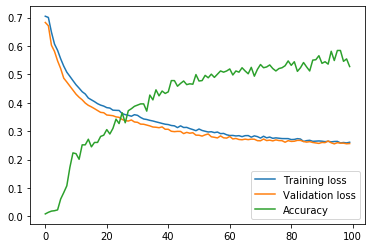

In [44]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.plot(history.history['accuracy'], label='Accuracy')
plt.legend()

(array([150.,  44.,  97.,  77.,  72.,  70.,  40.,  20.,  35.,  21.,  20.,
         17.,  12.,   9.,   8.,   4.,   0.,   3.,   0.,   0.,   3.,   2.,
          0.,   1.,   0.,   0.,   0.,   1.,   0.,   1.]),
 array([0.02782942, 0.06496001, 0.1020906 , 0.1392212 , 0.1763518 ,
        0.2134824 , 0.25061297, 0.28774357, 0.32487416, 0.36200476,
        0.39913535, 0.43626595, 0.47339654, 0.51052713, 0.5476577 ,
        0.5847883 , 0.6219189 , 0.6590495 , 0.6961801 , 0.7333107 ,
        0.7704413 , 0.8075719 , 0.8447025 , 0.8818331 , 0.9189637 ,
        0.95609426, 0.99322486, 1.0303555 , 1.067486  , 1.1046166 ,
        1.1417472 ], dtype=float32),
 <a list of 30 Patch objects>)

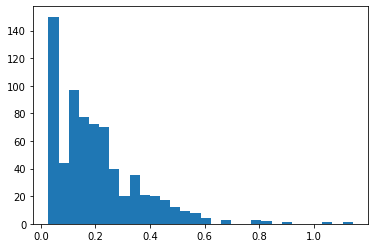

In [45]:
trainPredict = model.predict(Normal_train_3d)
trainMAE = np.mean(np.abs(trainPredict - Normal_train_3d),axis=2)
plt.hist(trainMAE, bins=30)

In [46]:
####We should not estimate the classification threshold from the test data. It will result in overfitting.
threshold = np.mean(trainMAE) + np.std(trainMAE)
print("Threshold: ", threshold)

Threshold:  0.3593974


(array([40., 57., 44., 37., 12.,  9.,  7., 10.,  4.,  9.,  3.,  2.,  0.,
         2.,  0.,  1.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.]),
 array([0.02782944, 0.09259519, 0.15736094, 0.22212669, 0.28689244,
        0.3516582 , 0.41642395, 0.4811897 , 0.5459554 , 0.6107212 ,
        0.6754869 , 0.7402527 , 0.8050184 , 0.8697842 , 0.9345499 ,
        0.9993157 , 1.0640814 , 1.1288472 , 1.1936129 , 1.2583787 ,
        1.3231444 , 1.3879102 , 1.4526759 , 1.5174417 , 1.5822074 ,
        1.6469733 , 1.711739  , 1.7765048 , 1.8412704 , 1.9060363 ,
        1.970802  ], dtype=float32),
 <a list of 30 Patch objects>)

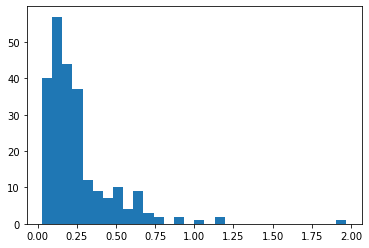

In [47]:
testPredict = model.predict(test_data_3d)
testMAE = np.mean(np.abs(testPredict - test_data_3d), axis=2)
plt.hist(testMAE, bins=30)

In [48]:
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, precision_score, f1_score
from sklearn.metrics import  auc, roc_curve

In [49]:
preds= tf.math.less(testMAE,threshold)
preds.shape

TensorShape([240, 1])

In [50]:
print("Accuracy = {}".format(accuracy_score(preds, test_labels)))
print("Precision = {}".format(precision_score(preds, test_labels)))
print("Recall = {}".format(recall_score(preds, test_labels)))
print("Fscore = {}".format(f1_score(preds, test_labels)))
print( 'Time=', elapsed_time )

Accuracy = 0.6541666666666667
Precision = 0.8044692737430168
Recall = 0.75
Fscore = 0.7762803234501348
Time= 24.733100414276123


In [51]:
conf_matrix = confusion_matrix(preds, test_labels)
conf_matrix

array([[ 13,  35],
       [ 48, 144]], dtype=int64)

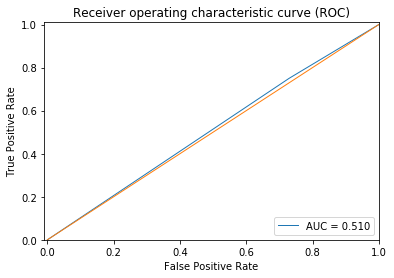

In [52]:
false_pos_rate, true_pos_rate, thresholds = roc_curve(preds, test_labels)
roc_auc = auc(false_pos_rate, true_pos_rate)

plt.plot(false_pos_rate, true_pos_rate, linewidth=1, label='AUC = %0.3f'% roc_auc)
plt.plot([0,1],[0,1], linewidth=1)

plt.xlim([-0.01, 1])
plt.ylim([0, 1.01])
plt.legend(loc='lower right')
plt.title('Receiver operating characteristic curve (ROC)')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
